# Vehicular Carbon Emissions Data Analysis

1. Data sources:
   - [kaggle source](https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles)
   - [original source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)
3. Technologies used:
   - Python
   - Pandas
   - Matplotlib
   - Jupyter Notebook
4. Analysis Methods used:
   - Descriptive Statistics
   - Correlation Testing
   - Simple Linear Regression

This analysis is a side project I am doing concurrently with my studies, so I purposefully chose to keep the statistical tests simple, and not perform any advances comparisons. Please feel free to reach out if you notice any errors or misinterpretations on my part, or ways to improve the notebook :)

<h1> 1. Getting familiar with the data </h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./emissions.csv", parse_dates=True)
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


The dataset's columns are briefly defined below:

- **Make:** The brand/manufacturer of the vehicle
- **Model:** The specific model name/number of the vehicle (e.g., Corolla, Civic, F-150) <br>
    - 4WD/4X4 = Four-wheel drive
    - AWD = All-wheel drive
    - FFV = Flexible-fuel vehicle
    - SWB = Short wheelbase
    - LWB = Long wheelbase
    - EWB = Extended wheelbase
- **Vehicle Class:** The category of the vehicle (e.g., sedan, SUV, truck).
- **Engine Size (L):** The volume of the vehicle's engine in liters.
- **Cylinders:** The number of cylinders in the vehicle's engine
- **Transmission:** The type of transmission system used in the vehicle (e.g., automatic, manual)
    - A = Automatic
    - AM = Automated manual
    - AS = Automatic with select shift
    - AV = Continuously variable
    - M = Manual
    - 3 - 10 = Number of gears
- **Fuel Type:** The type of fuel the vehicle uses for combustion
    - X = Regular gasoline
    - Z = Premium gasoline
    - D = Diesel
    - E = Ethanol (E85)
    - N = Natural gas
- **Fuel Consumption City (L/100 km):** The amount of fuel consumed by the vehicle per 100 kilometers of driving on city roads
- **Fuel Consumption Hwy (L/100 km):** The amount of fuel consumed by the vehicle per 100 kilometers of driving on highways
- **Fuel Consumption Comb (L/100 km):** The combined fuel consumption, taking into account both city and highway driving per 100 kilometers (55% city, 45% hwy)
- **Fuel Consumption Comb (mpg):** The combined fuel consumption, but expressed in miles per gallon (mpg)
- **CO2 Emissions (g/km):** The amount of tailpipe carbon dioxide emissions, in grams, produced by the vehicle per kilometer of driving

<h1> 2. Data Analysis </h1>

<h3> 2.1. Descriptive Statistics </h3>

In [2]:
# group by make and calculate mean for each
average_co2_by_make = df.groupby('Make')['CO2 Emissions(g/km)'].mean().reset_index()

# Uncomment the line to display the results as a list
# print(average_co2_by_make)

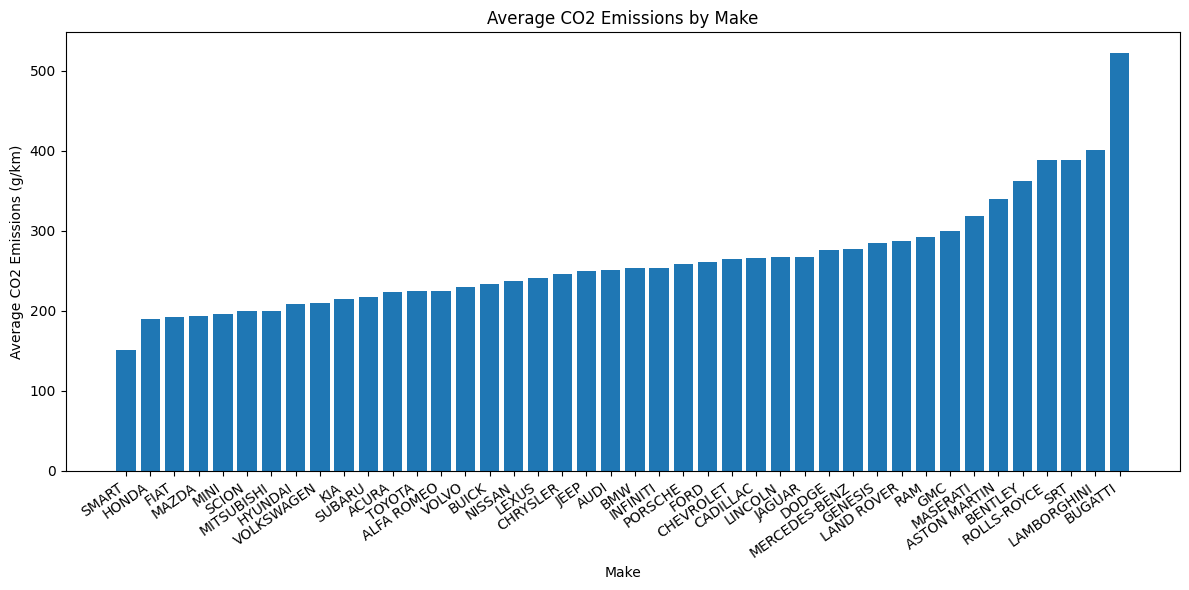

In [20]:
# sort df by average CO2 emissions
average_co2_by_make = average_co2_by_make.sort_values(by='CO2 Emissions(g/km)')

# bar plot
plt.figure(figsize=(12, 6))
plt.bar(average_co2_by_make['Make'], average_co2_by_make['CO2 Emissions(g/km)'])
plt.xlabel('Make')
plt.ylabel('Average CO2 Emissions (g/km)')
plt.title('Average CO2 Emissions by Make')
plt.xticks(rotation=35, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

From the bar plot above, we can see the average CO2 emissions released by each car make. We can easily infer that Buggati has the highest average, at 522 g/km. The lowest is Smart, a Mercedes-Benz automotive marque, at 151 g/km. However, the lowest independantly established car make is Honda with 190 g/km, more than 2.5 times lower than Buggati. What causes such a large discrepancy? One can assume the reason being the nature of the companies. Perhaps because Buggati manufactures "heavy-duty" cars, as in their models tend to have more powerful engines, more cylinders, and higher fuel quality requirements which may lead to higher emissions from combustion. In fact, most "luxury" car manufacturers tend to be on the higher side of emissions, such as Buggati, Lamborghini, Rolls-Royce, Bentley, and Maserati. As mentioned before, a possible reasoning for this could be the presence of more cylinders or larger engine size. We will examine these using regression later.

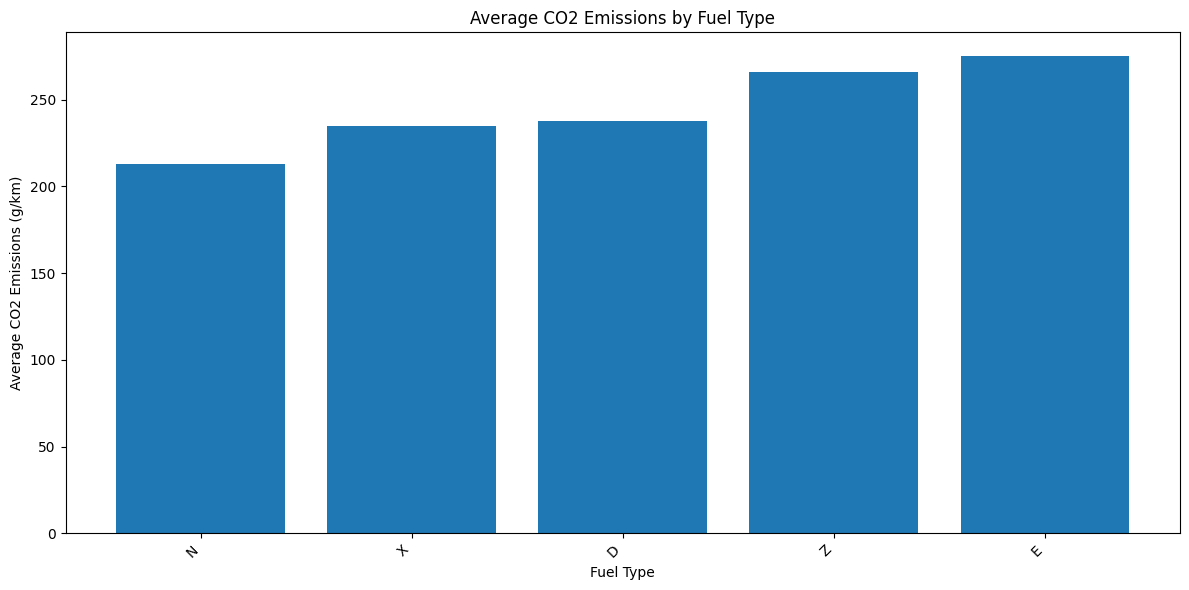

In [4]:
# group by fuel type and calc mean emission
average_co2_by_fueltype = df.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean().reset_index()

# sort by emission
average_co2_by_fueltype = average_co2_by_fueltype.sort_values(by='CO2 Emissions(g/km)')

# bar plot
plt.figure(figsize=(12, 6))
plt.bar(average_co2_by_fueltype['Fuel Type'], average_co2_by_fueltype['CO2 Emissions(g/km)'])
plt.xlabel('Fuel Type')
plt.ylabel('Average CO2 Emissions (g/km)')
plt.title('Average CO2 Emissions by Fuel Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

From the bar plot above, we find a very interesting statistic, the average CO2 emissions released by fuel type. As a reminder, here are the fuel types in the dataset: <br>
- N = Natural gas
- X = Regular gasoline
- D = Diesel
- Z = Premium gasoline
- E = Ethanol (E85)

We see that ethanol-powered cars (E) tend to release higher CO2 emissions, on average. This is surprising, as E85 fuel is known to _decrease_ CO2 emissions, as per the [U.S Dept. of Energy](https://afdc.energy.gov/vehicles/flexible_fuel_emissions.html#:~:text=E85%20decreases%20the%20emissions%20of,as%20benzene—a%20known%20carcinogen.). However the validity has also come under question, as reported by [Reuters](https://www.reuters.com/business/environment/us-corn-based-ethanol-worse-climate-than-gasoline-study-finds-2022-02-14/). Unfortuantely this is a statistical analysis, not environmental, so I will not go in-depth to explain fuel types and their respective combustion properties and emission percentages.

<h3> 2.2. Correlation testing </h3>

Correlation testing is a technique that calculates the strength and direction of the relationship between two variables, numerically represented by a correlation coefficient (r) that ranges from -1 to 1. This coefficient quantifies the degree to which changes in one variable correspond with changes in another (Positive values indicate a positive association, negative values signify a negative association, and zero implies no linear relationship). It primarily provides insights into the strength and direction of associations in data, helping researchers understand patterns and make predictions. 

**However, it's crucial to remember that correlation does not establish causation between variables. Meaning that if 2 variables appear to have a positive relationship, this does not mean an increase in one _causes_ an increase in the other!**

<h4> 2.2.1. Engine Size (L) </h4>

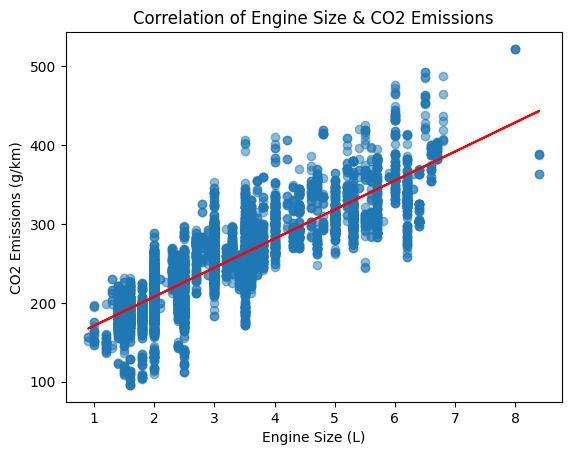

In [5]:
# scatterplot
plt.scatter(df['Engine Size(L)'], df['CO2 Emissions(g/km)'], alpha=0.5)

# Fit a linear regression line using polyfit and plot the line of best fit
coefficients = np.polyfit(df['Engine Size(L)'], df['CO2 Emissions(g/km)'], 1)
poly = np.poly1d(coefficients)
line_of_best_fit = poly(df['Engine Size(L)'])
plt.plot(df['Engine Size(L)'], line_of_best_fit, color='red')

# plot
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Correlation of Engine Size & CO2 Emissions')
plt.show()

<h4> 2.2.2. Cylinders </h4>

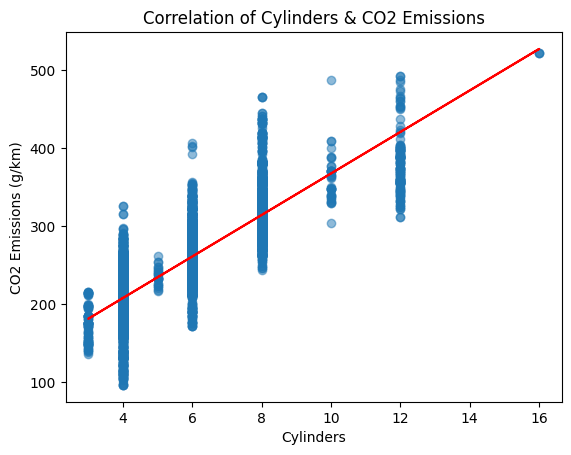

In [6]:
# scatterplot
plt.scatter(df['Cylinders'], df['CO2 Emissions(g/km)'], alpha=0.5)

# Fit a linear regression line using polyfit
coefficients = np.polyfit(df['Cylinders'], df['CO2 Emissions(g/km)'], 1)
poly = np.poly1d(coefficients)
line_of_best_fit = poly(df['Cylinders'])
plt.plot(df['Cylinders'], line_of_best_fit, color='red')


plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Correlation of Cylinders & CO2 Emissions')
plt.show()

In [16]:
# calculate correlation coefficients
e_coefficient = df['Engine Size(L)'].corr(df['CO2 Emissions(g/km)']).round(2)
c_coefficient = df['Cylinders'].corr(df['CO2 Emissions(g/km)']).round(2)
print("Correlation coefficient for Engine Size & CO2 Emissions: " +  str(e_coefficient))
print("Correlation coefficient for Cylinders & CO2 Emissions: " +  str(c_coefficient))

Correlation coefficient for Engine Size & CO2 Emissions: 0.85
Correlation coefficient for Cylinders & CO2 Emissions: 0.83


Both values are very close to 1, implying a positive association. This means that as one variable increases, the other variable also tends to increase, or that there is a tendency for the two variables to move in the same direction.

**However, do note that correlation does NOT imply causation. While both cases have a positive association, it doesn't necessarily mean that one variable causes the other to change. However in our case, the reader can comfortably infer both with correlation testing and common sense that causation is present in both cases.**

<h3> 2.3. Independant Make Analysis</h3>

In this section, we will observe a specific make more closely, calculating statistics for that make only, independant of others. This allows users to customize the analysis to a make of interest, perhaps one who's vehicle they own like what I've done below

In [8]:
# Choose make
make = 'BMW'
# Make a new df for that make only
make_df = df[df['Make'] == make]

make_df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
76,BMW,320i,COMPACT,2.0,4,A8,Z,10.0,6.5,8.4,34,193
77,BMW,320i,COMPACT,2.0,4,M6,Z,10.4,6.7,8.7,32,200
78,BMW,320i xDRIVE,COMPACT,2.0,4,A8,Z,10.2,7.0,8.8,32,202
79,BMW,328d xDRIVE,COMPACT,2.0,4,A8,D,7.6,5.5,6.7,42,181
80,BMW,328d xDRIVE TOURING,STATION WAGON - SMALL,2.0,4,A8,D,7.6,5.5,6.7,42,181
...,...,...,...,...,...,...,...,...,...,...,...,...
6635,BMW,X7 xDrive40i,SUV - STANDARD,3.0,6,AS8,Z,12.0,9.4,10.8,26,254
6636,BMW,X7 xDrive50i,SUV - STANDARD,4.4,8,AS8,Z,15.5,11.4,13.6,21,318
6637,BMW,X7 M50i,SUV - STANDARD,4.4,8,AS8,Z,15.5,11.4,13.6,21,318
6638,BMW,Z4 sDrive30i,TWO-SEATER,2.0,4,AS8,Z,9.5,7.4,8.5,33,200


In [9]:
# calculate mean fuel consumption for make
avg_city_consumption = make_df['Fuel Consumption City (L/100 km)'].mean().round(1)
avg_hwy_consumption = make_df['Fuel Consumption Hwy (L/100 km)'].mean().round(1)
avg_comb_consumption = make_df['Fuel Consumption Comb (L/100 km)'].mean().round(1)

print("Mean City Fuel Consumption is " + str(avg_city_consumption))
print("Mean Highway Fuel Consumption is " + str(avg_hwy_consumption))
print("Mean Combined Fuel Consumption is " + str(avg_comb_consumption))

Mean City Fuel Consumption is 12.6
Mean Highway Fuel Consumption is 8.7
Mean Combined Fuel Consumption is 10.9


Here we see mean fuel consumptions at different road types. You should notice that fuel consumption likely decreases on highways compared to city roads. This should have reason behind it, as vehicle mileage does improve at higher speeds, which are more common on highways. Vehicles tend to move slower and idle longer on city streets due to traffic light/signs and lower speed limits, contributing to higher fuel consumption.

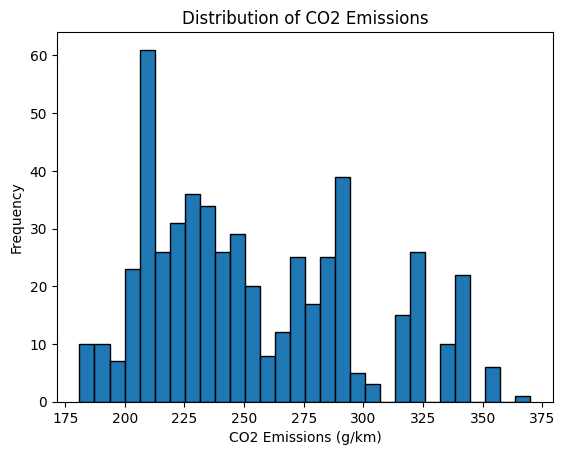

In [10]:
# make histogram of emissions for make
plt.hist(make_df['CO2 Emissions(g/km)'], bins=30, edgecolor='black')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.title('Distribution of CO2 Emissions')
plt.show()

The histogram shows the distribution of CO2 emissions in the models for the chosen make. For example if bars tend to be higher in the 200-250 region, it implies that most models have a CO2 emission of 200-250. As each user will choose their own make, I cannot comment on any specifics of the plot. In my case, I chose BMW, and can see that most BMW models have an emission rate of roughly 210-235 g/km.

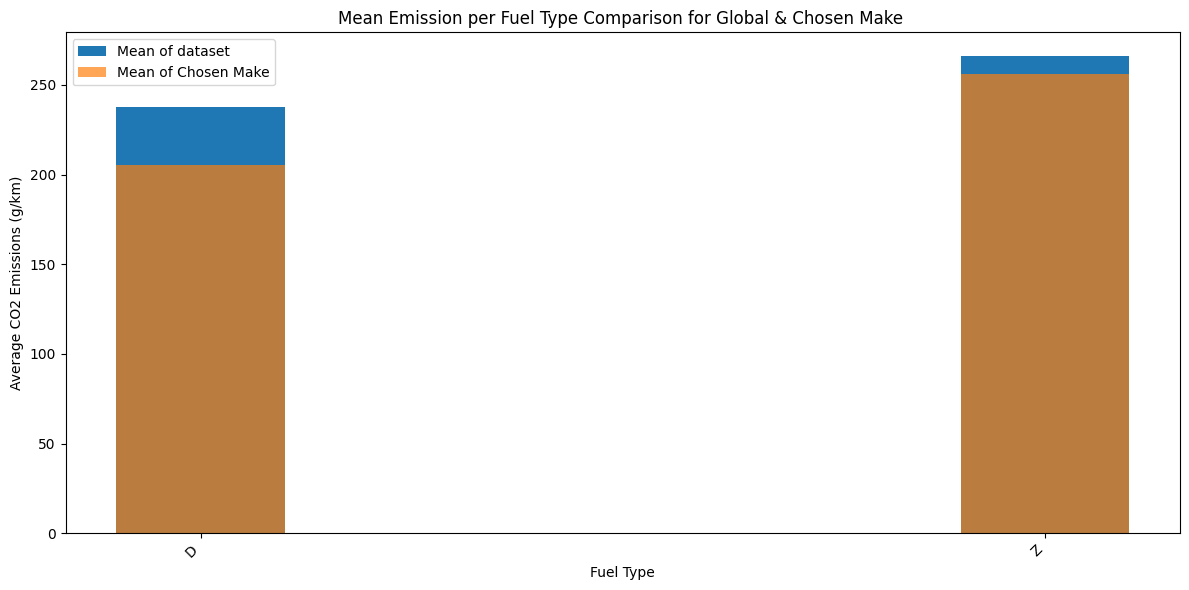

In [21]:
# group cars of make by their fuel type
em_by_model = make_df.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean().reset_index()
# common fuel types
common_fuel_types = set(average_co2_by_fueltype['Fuel Type']).intersection(set(em_by_model['Fuel Type']))

# filter df based on fuel type
average_co2_by_fueltype = average_co2_by_fueltype[average_co2_by_fueltype['Fuel Type'].isin(common_fuel_types)]
em_by_model = em_by_model[em_by_model['Fuel Type'].isin(common_fuel_types)]
fig, ax = plt.subplots(figsize=(12, 6))

# main plot
bar1 = ax.bar(average_co2_by_fueltype['Fuel Type'], average_co2_by_fueltype['CO2 Emissions(g/km)'], width=bar_width, label='Mean of dataset')
# make plot
bar2 = ax.bar(em_by_model['Fuel Type'], em_by_model['CO2 Emissions(g/km)'], width=bar_width, label='Mean of Chosen Make', alpha=0.7)

ax.set_xlabel('Fuel Type')
ax.set_ylabel('Average CO2 Emissions (g/km)')
ax.set_title('Mean Emission per Fuel Type Comparison for Global & Chosen Make ')
ax.legend()
ax.set_xticks(np.arange(len(common_fuel_types)))
ax.set_xticklabels(common_fuel_types, rotation=45, ha='right')
plt.tight_layout()
plt.show()

The bar graph above visually compares the mean CO2 emission per fuel type for the chosen model with the mean CO2 emission per fuel type for the entire dataset. As I chose BMW, which only uses fuel types Z and D, I can see that for both fuel types BMW has a slighly lower mean CO2 emission rate compared to the global mean.